In [1]:
import os
import math
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def E( j, beta, S1, S2, S3, S4 ):
    return beta*j*(S1*S2 + S2*S3 + S3*S4 + S1*S4)


In [12]:
def E( j, L ):
    energy = 0
    return energy


def Z( j, L, beta ):
    partition = 0
    spinList = np.zeros((2,2*L))
    for k in range(L):
        spinList[0,k] = 1
        spinList[1,k] = -1 
    for i in range(2):
        for k in range(L-1):
            partition = partition + math.exp(-j*beta*(spinList[i,k]*spinList[i,k + 1]))
        partition = partition + math.exp(-j*beta*(spinList[i,0]*spinList[i,L]))
    return partition

In [13]:
Z(1, 4, 1)

4.207276647028654

In [2]:
def lamda_p(temperature, J, B):
    beta = 1/temperature
    return math.exp(beta*J)*( math.cosh(beta*B) + math.sqrt((math.sinh(beta*B))**2 + math.exp(-4*beta*J)) )
def lamda_n(temperature, J, B):
    beta = 1/temperature
    return math.exp(beta*J)*( math.cosh(beta*B) - math.sqrt((math.sinh(beta*B))**2 + math.exp(-4*beta*J)) )
def T(temperature, J, B):
    beta = 1/temperature
    return np.array([[math.exp(beta*(J+B)),math.exp(-beta*(J))],[math.exp(-beta*(J)),math.exp(beta*(J-B))]])

[]

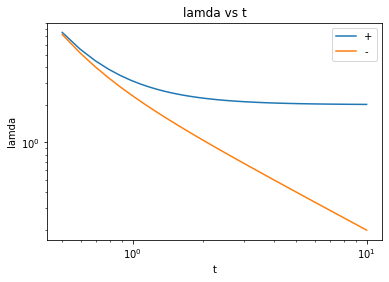

In [3]:
temperature = np.linspace(0.5,10,100)
y=[lamda_p(i, 1, 0) for i in temperature]
plt.plot(temperature, y, label = "+")
plt.title("lamda vs t")
y=[lamda_n(i, 1, 0) for i in temperature]
plt.plot(temperature, y, label = "-")
plt.legend(loc="best")
plt.xlabel("t")
plt.ylabel("lamda")
plt.loglog()

[]

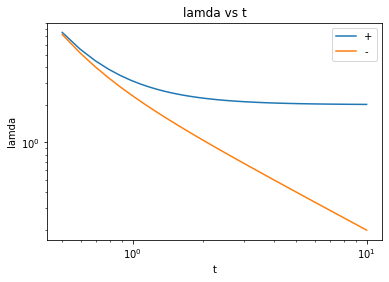

In [17]:
temperature = np.linspace(0.5,10,100)
y=[ np.linalg.eigvals(T(i,1,0))[0] for i in temperature]
plt.plot(temperature, y, label = "+")
plt.title("lamda vs t")
y=[ np.linalg.eigvals(T(i,1,0))[1]for i in temperature]
plt.plot(temperature, y, label = "-")
plt.xlabel("t")
plt.ylabel("lamda")
plt.legend(loc="best")
plt.loglog()

In [14]:
def twoD(temperature, J, B):
    beta = 1/temperature
    
    V1 = np.zeros((4,4))

    V1[0,0] = math.exp( 4*beta*J + 2*beta*B )
    V1[0,1] = math.exp( beta*B )
    V1[0,2] = math.exp( beta*B )
    V1[0,3] = 1
    V1[1,0] = math.exp( beta*B )
    V1[1,1] = 1
    V1[1,2] = math.exp( -4*beta*J)
    V1[1,3] = math.exp( -beta*B )
    V1[2,0] = math.exp( beta*B )
    V1[2,1] = math.exp( -4*beta*J)
    V1[2,2] = 1
    V1[2,3] = math.exp( -beta*B )
    V1[3,0] = 1
    V1[3,1] = math.exp( -beta*B )
    V1[3,2] = math.exp( -beta*B )
    V1[3,3] = math.exp( 4*beta*J - 2*beta*B )
    return V1
    """
    return np.array(
        [[math.exp(2*B*(1/temperature)+6*(1/temperature)*J),math.exp(B*(1/temperature)),math.exp(B*(1/temperature)),math.exp(2*J*(1/temperature))],
         [math.exp(B*(1/temperature)), math.exp(-2*J*(1/temperature)), math.exp(-6*J*(1/temperature)),math.exp(-B*(1/temperature))],
         [math.exp(B*(1/temperature)), math.exp(-6*J*(1/temperature)), math.exp(-2*J*(1/temperature)), math.exp(-B*(1/temperature))],
         [math.exp(2*J*(1/temperature)),math.exp(-B*(1/temperature)),math.exp(-B*(1/temperature)),math.exp(-2*B*(1/temperature)+6*(1/temperature)*J)]])
    """

[]

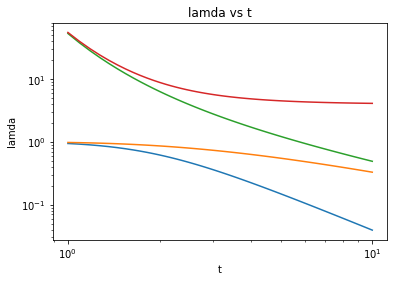

In [16]:
plt.title("lamda vs t")
temperature = np.linspace(1,10,100)
y=[ np.linalg.eigvalsh(twoD(i,1,0))[0] for i in temperature]
plt.plot(temperature, y, label = "1+")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[1] for i in temperature]
plt.plot(temperature, y, label = "1-")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[2] for i in temperature]
plt.plot(temperature, y, label = "2+")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[3] for i in temperature]
plt.plot(temperature, y, label = "2-")
plt.xlabel("t")
plt.ylabel("lamda")
plt.legend
plt.loglog()

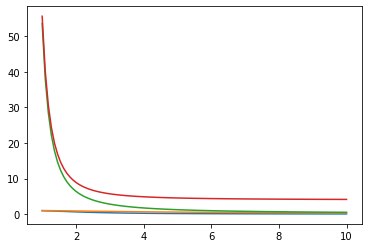

In [18]:
temperature = np.linspace(1,10,100)
xi = [ np.linalg.eigvalsh(twoD(i,1,0))[0] for i in temperature]
plt.plot(temperature, xi)
xi = [ np.linalg.eigvalsh(twoD(i,1,0))[1] for i in temperature]
plt.plot(temperature, xi)
xi = [ np.linalg.eigvalsh(twoD(i,1,0))[2] for i in temperature]
plt.plot(temperature, xi)
xi = [ np.linalg.eigvalsh(twoD(i,1,0))[3] for i in temperature]
plt.plot(temperature, xi)
plt.yscale = "log"


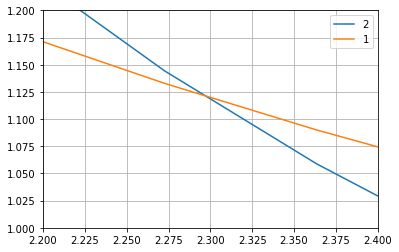

In [33]:
temperature = np.linspace(1,10,100)
xi = [ 1/np.log(np.linalg.eigvalsh(twoD(i,1,0))[3]/np.linalg.eigvalsh(twoD(i,1,0))[2])/2 for i in temperature]
plt.plot(temperature, xi, label = "2" )
xi = [ 1/np.log(np.linalg.eigvalsh(T(i,1,0))[1]/np.linalg.eigvalsh(T(i,1,0))[0]) for i in temperature]
plt.plot(temperature, xi, label = "1" )
plt.xlim(2.2,2.4)
plt.ylim(1,1.2)
plt.legend()
plt.grid()
plt.show()

In [37]:
t = 2
J = 1
beta = 1/t
M = np.array([[np.sqrt(math.cosh(beta*J)), np.sqrt(math.sinh(beta*J))],
                [np.sqrt(math.cosh(beta*J)),-np.sqrt(math.sinh(beta*J))]])

In [38]:
T = np.zeros((2,2,2,2))

for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                T[i,j,k,l] = np.sum(M[:,i]*M[:,j]*M[:,k]*M[:,l])

In [39]:
TT = np.tensordot(T,T,(1,3))
TT = np.transpose(TT,(0,3,4,1,5,2))
TT = TT.reshape((4,2,4,2))

In [30]:
print(np.shape(TT))

(4, 2, 4, 2)


In [40]:
np.linalg.eigh( np.trace(TT,axis1 = 1,axis2 =  3) )


(array([0.62044287, 0.86466472, 6.3890561 , 8.90394851]),
 array([[-0.35697752, -0.        ,  0.        , -0.93411298],
        [ 0.        , -0.70710678, -0.70710678,  0.        ],
        [ 0.        ,  0.70710678, -0.70710678,  0.        ],
        [ 0.93411298,  0.        ,  0.        , -0.35697752]]))

In [6]:
M = np.array([[1,2],[3,4]])
U, S, VD = np.linalg.svd(M)
print("U\n",U)
print("S\n",S)
print("VD\n",VD)

U
 [[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
S
 [5.4649857  0.36596619]
VD
 [[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


In [8]:
print(U @ np.diag(S) @VD)

[[1. 2.]
 [3. 4.]]


In [11]:
print(U.transpose() @ U)
print(VD.transpose() @ VD)

[[ 1.00000000e+00 -4.65956839e-17]
 [-4.65956839e-17  1.00000000e+00]]
[[ 1.00000000e+00 -9.58829555e-18]
 [-9.58829555e-18  1.00000000e+00]]


In [16]:
M = np.array([[1,2],[3,4],[5,6],[7,8]])
U, S, VD = np.linalg.svd(M,full_matrices=False)
print("U\n",U)
print("S\n",S)
print("VD\n",VD)
print("full\n", U @ np.diag(S) @VD)

U
 [[-0.15248323 -0.82264747]
 [-0.34991837 -0.42137529]
 [-0.54735351 -0.0201031 ]
 [-0.74478865  0.38116908]]
S
 [14.2690955   0.62682823]
VD
 [[-0.64142303 -0.7671874 ]
 [ 0.7671874  -0.64142303]]
full
 [[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]


In [17]:
M = np.array([[1,2,3,4],[5,6,7,8]])
U, S, VD = np.linalg.svd(M,full_matrices=False)
print("U\n",U)
print("S\n",S)
print("VD\n",VD)
print("full\n", U @ np.diag(S) @VD)

U
 [[-0.37616823  0.92655138]
 [-0.92655138 -0.37616823]]
S
 [14.22740741  1.25732984]
VD
 [[-0.35206169 -0.44362578 -0.53518987 -0.62675396]
 [-0.75898127 -0.3212416   0.11649807  0.55423774]]
full
 [[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


In [33]:
D = 6
cut = 1
M = np.random.rand(D,D)
print("\n")
U,S,Vd = np.linalg.svd(M,full_matrices=False)
print("M\n", M)
print("S\n", S)
print("Vd\n", Vd)
S_cut = S
S_cut[len(S)-cut:len(S)] = 0
print("S_cut\n", S_cut)
M_cut = U @ np.diag(S_cut) @Vd
print("full\n", U @ np.diag(S_cut) @Vd)
print("max", np.max(M - M_cut))



M
 [[0.08447891 0.69764616 0.36593067 0.0361618  0.30229431 0.71430562]
 [0.03492945 0.19631514 0.8555092  0.51798598 0.5874561  0.15424849]
 [0.38689077 0.1521745  0.24048364 0.4310933  0.73990771 0.40616323]
 [0.12885818 0.09956314 0.54300229 0.27892414 0.63950416 0.01409999]
 [0.87563782 0.87468036 0.67613601 0.29543117 0.39970214 0.39866748]
 [0.73450345 0.16570453 0.30972178 0.75391995 0.66904103 0.66147117]]
S
 [2.66737222 0.96045928 0.79452391 0.57741993 0.29176524 0.03210491]
Vd
 [[-0.395044   -0.34955144 -0.4494101  -0.36817938 -0.49649647 -0.37110617]
 [ 0.2370766   0.66807667 -0.15939085 -0.40978095 -0.44957681  0.3194105 ]
 [-0.53238374  0.32691597  0.67597428 -0.25813328 -0.00773795 -0.29335917]
 [-0.64518409 -0.02454429 -0.20828352 -0.04368732  0.23139257  0.69591806]
 [ 0.1027732   0.14527154 -0.3075029  -0.5583502   0.70299319 -0.26042549]
 [ 0.27834805 -0.55036993  0.42159676 -0.56234082 -0.05975045  0.34939114]]
S_cut
 [2.66737222 0.96045928 0.79452391 0.57741993 0.

In [34]:
D = 6
cut = 1
M = np.random.rand(D,D)
print("\n")
U,S,Vd = np.linalg.svd(M,full_matrices=False)
print("M\n", M)
print("S\n", S)
print("Vd\n", Vd)
S_cut = np.zeros(len(S)-cut)
S_cut[:] = S[0:len(S)-cut]
S_cut = np.zeros(len(S)-cut)


print("S_cut\n", S_cut)
M_cut = U @ np.diag(S_cut) @Vd
print("full\n", U @ np.diag(S_cut) @Vd)
print("max", np.max(M - M_cut))



M
 [[0.04705837 0.27372458 0.20210953 0.43464975 0.12488718 0.72501719]
 [0.42189385 0.22419106 0.10082887 0.96882853 0.4133715  0.89765782]
 [0.63386133 0.51708846 0.49622997 0.84739056 0.60005722 0.45764661]
 [0.85518096 0.45449072 0.17096089 0.8285985  0.72071156 0.19942811]
 [0.6267179  0.78663967 0.55322528 0.59697643 0.83164921 0.233526  ]
 [0.4334788  0.12575096 0.23440611 0.64845604 0.85439574 0.00777394]]
S
 [3.11752347 1.02196061 0.58289588 0.34345689 0.16142142 0.00342474]
Vd
 [[-0.42496822 -0.32795414 -0.23781262 -0.57358229 -0.48156413 -0.30723377]
 [ 0.2688163   0.11587161  0.12194665 -0.22184725  0.41364425 -0.82408908]
 [-0.1620673   0.6873117   0.52813824 -0.41052824 -0.18571512  0.13922384]
 [ 0.67630352  0.29401688 -0.35802699 -0.00391617 -0.56775899 -0.07495795]
 [ 0.12799877 -0.37711438  0.69020614  0.33355274 -0.45064142 -0.22512538]
 [-0.49709543  0.42185459 -0.21231189  0.58479137 -0.19255223 -0.3883313 ]]
S_cut
 [3.11752347 1.02196061 0.58289588 0.34345689 0.

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 6)